# Proyek Analisis Data: Bike Saring Dataset
- **Nama:** Alridho Tristan Satriawan
- **Email:** alridho.tristans@gmail.com
- **ID Dicoding:** Alridho Tristan Satriawan

## Menentukan Pertanyaan Bisnis

- Bagaimana tren total peminjaman dari waktu ke waktu?

- Bagaimana pengaruh kondisi cuaca terhadap aktivitas pengguna?

- Bagaimana hari libur dan akhir pekan mempengaruhi tingkat peminjaman?

- Musim mana yang memiliki aktivitas tertinggi dan terendah?

- Berapa persentase peminjaman yang dilakukan oleh pengguna kasual dibandingkan dengan pengguna terdaftar?

- Berapa rata-rata jumlah peminjaman harian berdasarkan hari dalam seminggu?

- Bagaimana perbedaan aktivitas antara hari kerja dan hari libur?

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import gdown

In [126]:
file_id_day = '1TmdARhYlfCtNXul1bqNXNEogyimEuaxG'
file_id_hours = '1qoy0WhDojt3yPc5yjCsQUiOuvbi5BVWJ'


url_day = f'https://drive.google.com/uc?id={file_id_day}'
output_day = 'day.csv'
gdown.download(url_day, output_day, quiet=False)

url_hours = f'https://drive.google.com/uc?id={file_id_hours}'
output_hours = 'hours.csv'
gdown.download(url_hours, output_hours, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1TmdARhYlfCtNXul1bqNXNEogyimEuaxG
To: /content/day.csv
100%|██████████| 57.6k/57.6k [00:00<00:00, 49.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qoy0WhDojt3yPc5yjCsQUiOuvbi5BVWJ
To: /content/hours.csv
100%|██████████| 1.16M/1.16M [00:00<00:00, 53.4MB/s]


'hours.csv'

## Data Wrangling

### Gathering Data

In [127]:
day_df = pd.read_csv(output_day)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [128]:
hours_df = pd.read_csv(output_hours)
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dampak musiman dan cuaca pada jumlah pengguna.
- Korelasi antara suhu, kelembaban, dan pola penggunaan.
- Variasi penggunaan sepanjang jam, mengidentifikasi waktu puncak.
- Perbandingan antara tren penggunaan hari kerja vs. akhir pekan.
- Dampak cuaca dan status hari kerja pada penggunaan per jam.

### Assessing Data

#### Menilai tabel `day_df`

In [129]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [130]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hours_df`

In [131]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [132]:
print("Jumlah duplikasi: ",hours_df.duplicated().sum())
hours_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat kesalahan tipe data untuk kolom dteday

### Cleaning Data

#### Membersihkan tabel `day_df`

In [133]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Memperbaiki tipe data

In [134]:
dteday_columns = ["dteday"]

for column in dteday_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [135]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [136]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membersihkan tabel `hours_df`

In [137]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Memperbaiki tipe data

In [138]:
dteday_columns = ["dteday"]

for column in dteday_columns:
  hours_df[column] = pd.to_datetime(day_df[column])

In [139]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [140]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- tipe data pada kolom dteday telah diubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore day_df

In [141]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
401,402,2012-02-06,1,1,2,0,1,1,1,0.282609,0.296426,0.622174,0.153800,206,3578,3784
242,243,2011-08-31,3,0,8,0,3,1,1,0.656667,0.611121,0.597917,0.083333,688,4370,5058
576,577,2012-07-30,3,1,7,0,1,1,1,0.730833,0.684987,0.668750,0.153617,1040,6065,7105
63,64,2011-03-05,1,0,3,0,6,0,2,0.384167,0.378779,0.789167,0.251871,640,1437,2077
442,443,2012-03-18,1,1,3,0,0,0,2,0.472500,0.464000,0.810000,0.126883,2207,3685,5892


In [142]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [143]:
day_df.instant.is_unique

True

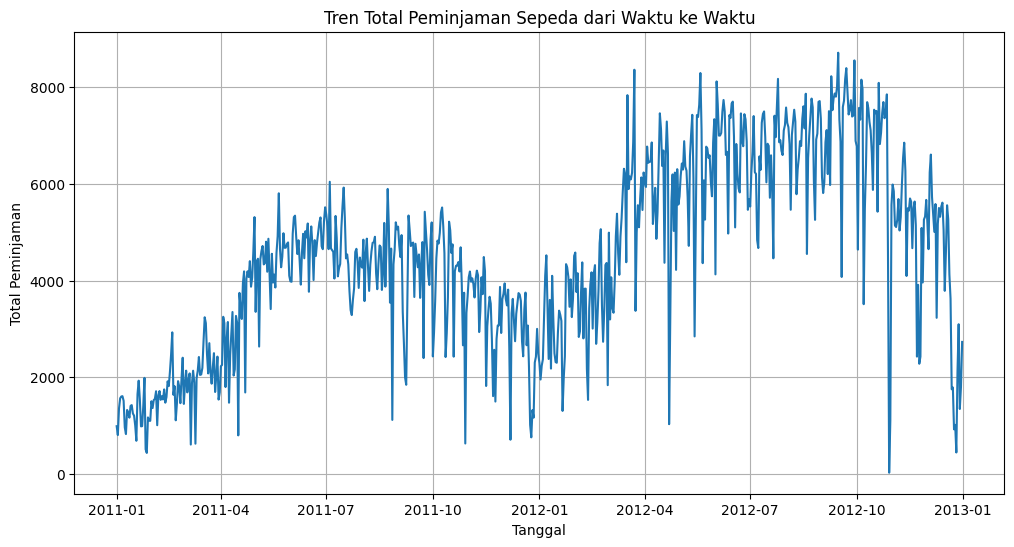

In [144]:


import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(day_df['dteday'], day_df['cnt'])
plt.xlabel('Tanggal')
plt.ylabel('Total Peminjaman')
plt.title('Tren Total Peminjaman Sepeda dari Waktu ke Waktu')
plt.grid(True)
plt.show()

In [145]:
day_df.groupby(by="dteday").cnt.nunique().sort_values(ascending=False)

,cnt
dteday,
2011-01-01,1
2012-04-25,1
2012-04-27,1
2012-04-28,1
2012-04-29,1
...,...
2011-09-03,1
2011-09-04,1
2011-09-05,1


In [146]:
day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std" ],
})

instant casual                              registered       \
           nunique    max min         mean         std        max  min   
workingday                                                               
0              231   3410  54  1371.134199  873.064794       5966  451   
1              500   2469   2   606.570000  391.496032       6946   20   

                                       cnt                                 
                   mean          std   max  min         mean          std  
workingday                                                                 
0           2959.034632  1293.867686  8714  605  4330.168831  2052.141245  
1           3978.250000  1568.692453  8362   22  4584.820000  1878.415583

In [147]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ],
})

instant casual                             registered       \
           nunique    max min        mean         std        max  min   
weathersit                                                              
1              463   3410  15  964.030238  700.476488       6946  416   
2              247   3155   9  687.352227  619.082767       6844  491   
3               21   1264   2  185.476190  260.975022       4324   20   

                                       cnt                                 
                   mean          std   max  min         mean          std  
weathersit                                                                 
1           3912.755940  1533.347265  8714  431  4876.786177  1879.483989  
2           3348.510121  1463.566884  8362  605  4035.862348  1809.109918  
3           1617.809524  1068.290954  4639   22  1803.285714  1240.284449

In [148]:
day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std","sum" ],
})

instant casual                              registered        \
        nunique    max min         mean         std        max   min   
weekday                                                                
0           105   3283  54  1338.295238  809.324777       5657   451   
1           105   3065   2   674.133333  493.777298       6435    20   
2           104   1348   9   556.182692  342.748705       6697   573   
3           104   2562   9   551.144231  401.808954       6946   432   
4           104   1405  15   590.961538  371.680307       6781   416   
5           104   2469  38   752.288462  483.422400       6917  1129   
6           105   3410  57  1465.257143  927.082884       5966   570   

                                    cnt                                  \
                mean          std   max   min         mean          std   
weekday                                                                   
0        2890.533333  1179.713036  8227   605  4228.828571  1872.496629   
1        3663.990476  1504.215925  7525    22  4338.123810  1793.074013   
2        3954.480769  1549.462149  7767   683  4510.663462  1826.911642   
3        3997.394231  1723.710208  8173   441  4548.538462  2038.095884   
4        4076.298077  1642.753330  7804   431  4667.259615  1939.433317   
5        3938.000000  1494.998698  8362  1167  4690.288462  1874.624870   
6        3085.285714  1358.068784  8714   627  4550.542857  2196.693009   

                 
            sum  
weekday          
0        444027  
1        455503  
2        469109  
3        473048  
4        485395  
5        487790  
6        477807

In [149]:
weekend_df = day_df[(day_df['weekday'] == 5) | (day_df['weekday'] == 6)]

In [150]:
weekend_df = day_df[(day_df['weekday'] == 5) | (day_df['weekday'] == 6)]
weekend_holidays = weekend_df[weekend_df['holiday'] == 1]
print(len(weekend_holidays))

2


In [151]:
day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", "sum"],
})

instant casual                               registered       \
        nunique    max  min         mean         std        max  min   
holiday                                                                
0           710   3410    2   841.771831  680.528529       6946   20   
1            21   3065  117  1064.714286  860.046809       5172  573   

                                    cnt                                  \
                mean          std   max   min         mean          std   
holiday                                                                   
0        3685.332394  1553.704431  8714    22  4527.104225  1929.013947   
1        2670.285714  1492.860246  7403  1000  3735.000000  2103.350660   

                  
             sum  
holiday           
0        3214244  
1          78435

In [152]:
day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", "sum"],
})

instant casual                              registered       \
           nunique    max min         mean         std        max  min   
workingday                                                               
0              231   3410  54  1371.134199  873.064794       5966  451   
1              500   2469   2   606.570000  391.496032       6946   20   

                                       cnt                                 \
                   mean          std   max  min         mean          std   
workingday                                                                  
0           2959.034632  1293.867686  8714  605  4330.168831  2052.141245   
1           3978.250000  1568.692453  8362   22  4584.820000  1878.415583   

                     
                sum  
workingday           
0           1000269  
1           2292410

In [153]:

day_df['is_weekend'] = day_df['weekday'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Non-Weekend')


weekend_nonweekend_df = day_df.groupby('is_weekend').agg({
    "instant": "nunique",
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"],
})

weekend_nonweekend_df

,instant,casual,registered,cnt
,nunique,mean,mean,mean
is_weekend,,,,
Non-Weekend,522,743.155172,3714.856322,4458.011494
Weekend,209,1110.478469,3509.602871,4620.081340


In [154]:
user_columns = ['casual', 'registered', 'cnt']
day_outliers = day_df[user_columns].describe()
hours_outliers = hours_df[user_columns].describe()



In [155]:
filtered_df = day_df[(day_df['weekday'] == 5) | (day_df['weekday'] == 6)]

filtered_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std", "sum"],
})

instant casual                              registered        \
        nunique    max min         mean         std        max   min   
weekday                                                                
5           104   2469  38   752.288462  483.422400       6917  1129   
6           105   3410  57  1465.257143  927.082884       5966   570   

                                    cnt                                  \
                mean          std   max   min         mean          std   
weekday                                                                   
5        3938.000000  1494.998698  8362  1167  4690.288462  1874.624870   
6        3085.285714  1358.068784  8714   627  4550.542857  2196.693009   

                 
            sum  
weekday          
5        487790  
6        477807

In [156]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", "sum"],
})

instant casual                               registered       \
       nunique    max  min         mean         std        max  min   
season                                                                
1          181   3155    9   334.928177  387.655561       5315  416   
2          184   3410  120  1106.097826  737.590829       6456  674   
3          188   3160  118  1202.611702  595.975032       6917  889   
4          178   3031    2   729.112360  606.318118       6946   20   

                                   cnt                                  \
               mean          std   max   min         mean          std   
season                                                                   
1       2269.204420  1200.269751  7836   431  2604.132597  1399.942119   
2       3886.233696  1353.375628  8362   795  4992.331522  1695.977235   
3       4441.691489  1304.626949  8714  1115  5644.303191  1459.800381   
4       3999.050562  1444.782557  8555    22  4728.162921  1699.615261   

                 
            sum  
season           
1        471348  
2        918589  
3       1061129  
4        841613

In [157]:
day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": [ "mean", ],
    "registered": [ "mean",  ],
    "cnt": [ "mean", ],
})

,instant,casual,registered,cnt
,nunique,mean,mean,mean
weekday,,,,
0,105,1338.295238,2890.533333,4228.828571
1,105,674.133333,3663.990476,4338.123810
2,104,556.182692,3954.480769,4510.663462
3,104,551.144231,3997.394231,4548.538462
4,104,590.961538,4076.298077,4667.259615
5,104,752.288462,3938.000000,4690.288462
6,105,1465.257143,3085.285714,4550.542857


In [158]:

day_df['casual_sum'] = day_df['casual'].sum()
day_df['registered_sum'] = day_df['registered'].sum()
day_df['cnt_sum'] = day_df['cnt'].sum()


day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_weekend,casual_sum,registered_sum,cnt_sum
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Weekend,620017,2672662,3292679
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Non-Weekend,620017,2672662,3292679
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Non-Weekend,620017,2672662,3292679
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Non-Weekend,620017,2672662,3292679
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Non-Weekend,620017,2672662,3292679


In [159]:
weathersit_day = day_df['weathersit'].value_counts()
weathersit_hour = hours_df['weathersit'].value_counts()

**Insight:**
- Semakin cerah/ bagus cuaca aktivitas pengguna semakin naik (sebanding)
- Pada hari libur aktivitas pengguna lebih rendah tetapi pada weekend aktivitas pengguna lebih tinggi
- Musim paling tinggi terdapat pada musim 3 atau summer sedangkan terendah pada musim 1 atau winter
- Aktivitas pada hari kerja lebih tinggi pada pengguna terdaftar/registered sedangkan pengguna casual lebih tinggi pada hari libur. Untuk total pengguna, aktivitas lebih tinggi pada hari kerja

### Explore hours_df

In [160]:
hours_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
9670,9671,NaT,1,1,2,21,0,0,0,1,0.14,0.1212,0.43,0.2985,0,36,36
8932,8933,NaT,1,1,1,1,0,5,1,2,0.38,0.3939,0.76,0.2985,0,12,12
1026,1027,NaT,1,0,2,11,0,2,1,1,0.26,0.2424,0.25,0.2537,11,46,57
9405,9406,NaT,1,1,2,19,0,3,1,1,0.54,0.5152,0.52,0.2836,20,315,335
16072,16073,NaT,4,1,11,9,0,3,1,2,0.26,0.2424,0.60,0.2836,17,351,368


In [161]:
hours_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,731,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-01 00:00:00,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [162]:
hours_df.instant.is_unique

True

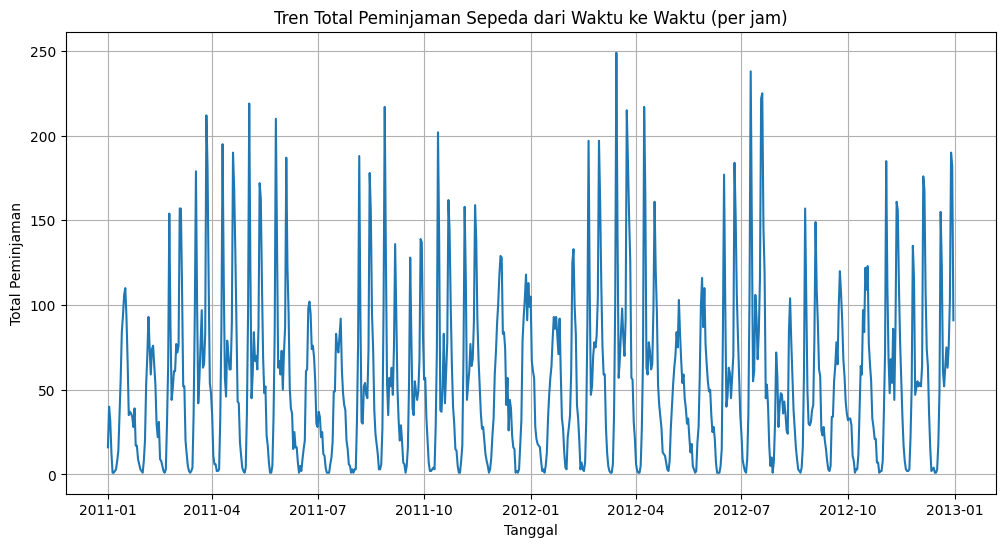

In [163]:


plt.figure(figsize=(12, 6))
plt.plot(hours_df['dteday'], hours_df['cnt'])
plt.xlabel('Tanggal')
plt.ylabel('Total Peminjaman')
plt.title('Tren Total Peminjaman Sepeda dari Waktu ke Waktu (per jam)')
plt.grid(True)
plt.show()

In [164]:
hours_df.groupby(by="dteday").cnt.nunique().sort_values(ascending=False)

,cnt
dteday,
2011-01-01,1
2012-04-25,1
2012-04-27,1
2012-04-28,1
2012-04-29,1
...,...
2011-09-03,1
2011-09-04,1
2011-09-05,1


In [165]:
hours_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std" ],
})

instant casual                           registered      \
           nunique    max min       mean        std        max min   
workingday                                                           
0             5514    367   0  57.441422  71.713021        601   0   
1            11865    264   0  25.561315  29.130487        886   0   

                                    cnt                              
                  mean         std  max min        mean         std  
workingday                                                           
0           123.963910  107.779533  783   1  181.405332  172.853832  
1           167.646439  165.990865  977   1  193.207754  185.107477

In [166]:
hours_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", ],
})

instant casual                           registered      \
           nunique    max min       mean        std        max min   
weathersit                                                           
1            11413    367   0  40.545431  53.126559        886   0   
2             4544    350   0  29.595290  41.356704        822   0   
3             1419    263   0  16.055673  30.017327        791   0   
4                3      6   1   2.666667   2.886751        158  22   

                                    cnt                              
                  mean         std  max min        mean         std  
weathersit                                                           
1           164.323841  156.890453  977   1  204.869272  189.487773  
2           145.570202  142.390431  957   1  175.165493  165.431589  
3            95.523608  114.773469  891   1  111.579281  133.781045  
4            71.666667   75.048873  164  23   74.333333   77.925178

In [167]:
hours_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std","sum" ],
})

instant casual                           registered                  \
        nunique    max min       mean        std        max min        mean   
weekday                                                                       
0          2502    317   0  56.163469  68.090663        526   0  121.305356   
1          2479    272   0  28.553449  35.097056        857   0  155.191206   
2          2453    178   0  23.580514  26.170895        871   0  167.658377   
3          2475    237   0  23.159192  27.790658        886   0  167.971313   
4          2471    154   0  24.872521  27.768088        885   0  171.564144   
5          2487    264   0  31.458786  36.487534        757   0  164.677121   
6          2512    367   0  61.246815  77.020582        491   0  128.962978   

                     cnt                                      
                std  max min        mean         std     sum  
weekday                                                       
0        105.972899  776   1  177.468825  168.167710  444027  
1        159.517897  968   1  183.744655  179.514167  455503  
2        170.103245  970   1  191.238891  187.820480  469109  
3        172.344752  977   1  191.130505  190.894464  473048  
4        169.327395  976   1  196.436665  188.011923  485395  
5        149.905977  957   1  196.135907  174.076894  487790  
6        108.600931  783   1  190.209793  179.820569  477807

In [168]:
weekendh_df = hours_df[(day_df['weekday'] == 5) | (hours_df['weekday'] == 6)]
weekendh_holidays = weekendh_df[weekendh_df['holiday'] == 1]
print(len(weekendh_holidays))

3


In [169]:
hours_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", "sum"],
})

instant casual                           registered                  \
        nunique    max min       mean        std        max min        mean   
holiday                                                                       
0         16879    367   0  35.408377  48.963745        886   0  155.020203   
1           500    272   0  44.718000  59.041360        601   0  112.152000   

                     cnt                                      
                std  max min       mean         std      sum  
holiday                                                       
0        152.210779  977   1  190.42858  181.981435  3214244  
1        111.369094  712   1  156.87000  156.757478    78435

In [170]:
hours_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", "sum"],
})

instant casual                           registered      \
           nunique    max min       mean        std        max min   
workingday                                                           
0             5514    367   0  57.441422  71.713021        601   0   
1            11865    264   0  25.561315  29.130487        886   0   

                                    cnt                                       
                  mean         std  max min        mean         std      sum  
workingday                                                                    
0           123.963910  107.779533  783   1  181.405332  172.853832  1000269  
1           167.646439  165.990865  977   1  193.207754  185.107477  2292410

In [171]:
filteredh_df = hours_df[(hours_df['weekday'] == 5) | (hours_df['weekday'] == 6)]

filteredh_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std", "sum"],
})

instant casual                           registered                  \
        nunique    max min       mean        std        max min        mean   
weekday                                                                       
5          2487    264   0  31.458786  36.487534        757   0  164.677121   
6          2512    367   0  61.246815  77.020582        491   0  128.962978   

                     cnt                                      
                std  max min        mean         std     sum  
weekday                                                       
5        149.905977  957   1  196.135907  174.076894  487790  
6        108.600931  783   1  190.209793  179.820569  477807

In [172]:
hours_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "cnt": ["max", "min", "mean", "std", "sum"],
})

instant casual                           registered                  \
       nunique    max min       mean        std        max min        mean   
season                                                                       
1         4242    367   0  14.290901  27.463006        681   0   96.823668   
2         4409    361   0  46.160581  57.455803        782   0  162.183488   
3         4496    350   0  50.287144  51.751916        886   0  185.729093   
4         4232    362   0  30.666824  46.034058        876   0  168.202032   

                    cnt                                       
               std  max min        mean         std      sum  
season                                                        
1       104.347605  801   1  111.114569  119.224010   471348  
2       152.751493  957   1  208.344069  188.362473   918589  
3       166.430156  977   1  236.016237  197.711630  1061129  
4       157.559340  967   1  198.868856  182.967972   841613

In [173]:
hours_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": [ "mean", ],
    "registered": [ "mean",  ],
    "cnt": [ "mean", ],
})

,instant,casual,registered,cnt
,nunique,mean,mean,mean
weekday,,,,
0,2502,56.163469,121.305356,177.468825
1,2479,28.553449,155.191206,183.744655
2,2453,23.580514,167.658377,191.238891
3,2475,23.159192,167.971313,191.130505
4,2471,24.872521,171.564144,196.436665
5,2487,31.458786,164.677121,196.135907
6,2512,61.246815,128.962978,190.209793


In [174]:

hours_df['is_weekend'] = hours_df['weekday'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Non-Weekend')


weekendh_nonweekend_df = hours_df.groupby('is_weekend').agg({
    "instant": "nunique",
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"],
})

weekendh_nonweekend_df

,instant,casual,registered,cnt
,nunique,mean,mean,mean
is_weekend,,,,
Non-Weekend,12380,31.334976,156.636107,187.971082
Weekend,4999,46.427285,146.730746,193.158032


In [175]:
hours_df['casual_sum'] = hours_df['casual'].sum()
hours_df['registered_sum'] = hours_df['registered'].sum()
hours_df['cnt_sum'] = hours_df['cnt'].sum()


hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,is_weekend,casual_sum,registered_sum,cnt_sum
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,Weekend,620017,2672662,3292679
1,2,2011-01-02,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,Weekend,620017,2672662,3292679
2,3,2011-01-03,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,Weekend,620017,2672662,3292679
3,4,2011-01-04,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,Weekend,620017,2672662,3292679
4,5,2011-01-05,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,Weekend,620017,2672662,3292679


In [176]:
weathersit_day = day_df['weathersit'].value_counts()
weathersit_hour = hours_df['weathersit'].value_counts()

**Insight:**
- Semakin cerah/ bagus cuaca aktivitas pengguna semakin naik (sebanding)
- Pada hari libur aktivitas pengguna lebih rendah tetapi pada weekend aktivitas lebih tinggi
- Musim paling tinggi terdapat pada musim 3 atau summer sedangkan terendah pada musim 1 atau winter
- Aktivitas pada hari kerja lebih tinggi pada pengguna terdaftar/registered sedangkan pengguna casual lebih tinggi pada hari libur. Untuk total pengguna, aktivitas lebih tinggi pada hari kerja

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren total peminjaman dari waktu ke waktu?

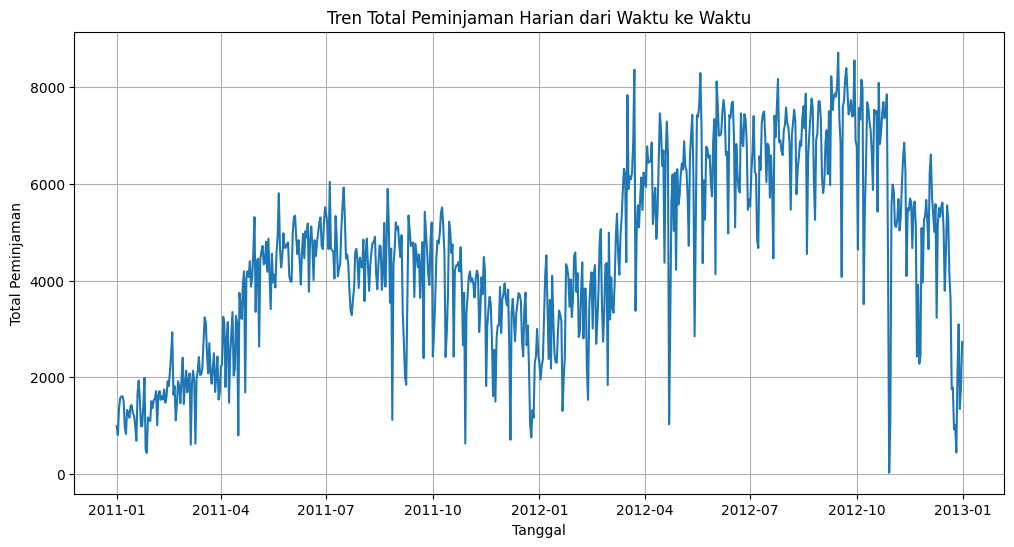

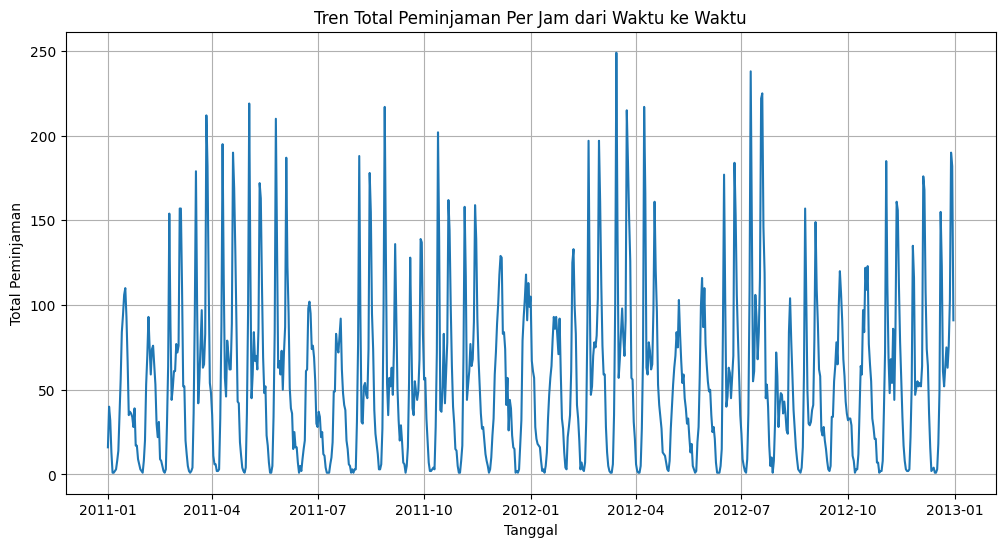

In [177]:
plt.figure(figsize=(12, 6))
plt.plot(day_df['dteday'], day_df['cnt'])
plt.xlabel('Tanggal')
plt.ylabel('Total Peminjaman')
plt.title('Tren Total Peminjaman Harian dari Waktu ke Waktu')
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(hours_df['dteday'], hours_df['cnt'])
plt.xlabel('Tanggal')
plt.ylabel('Total Peminjaman')
plt.title('Tren Total Peminjaman Per Jam dari Waktu ke Waktu')
plt.grid(True)
plt.show()

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap aktivitas pengguna?

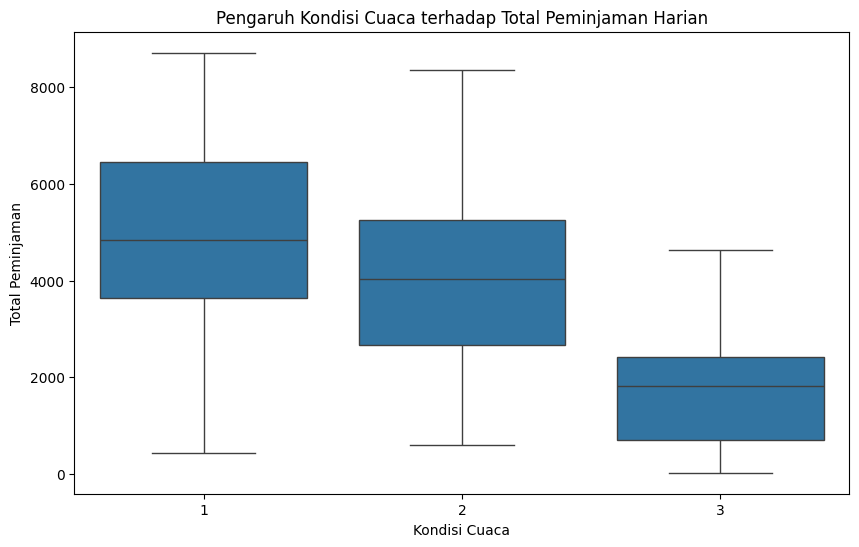

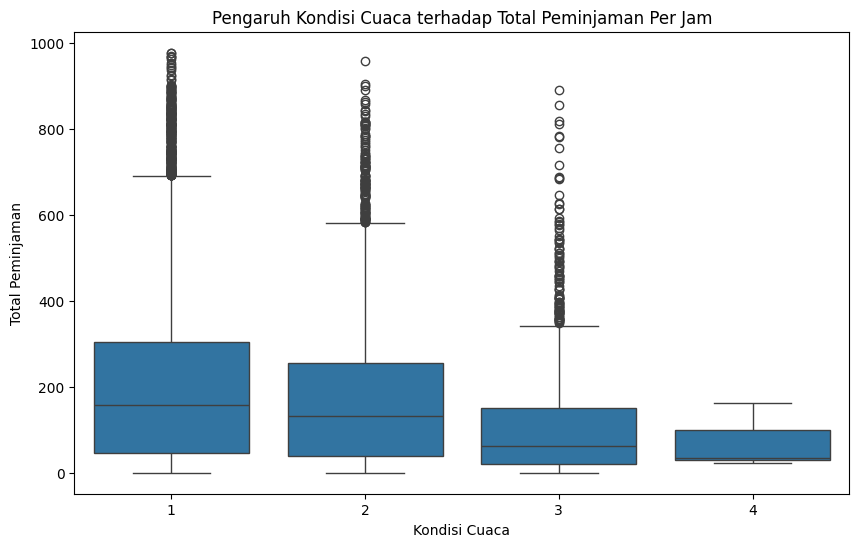

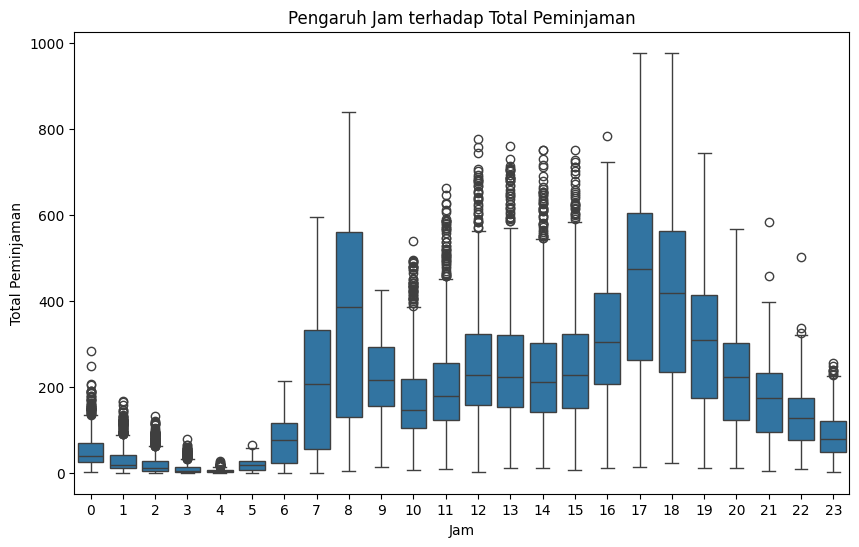

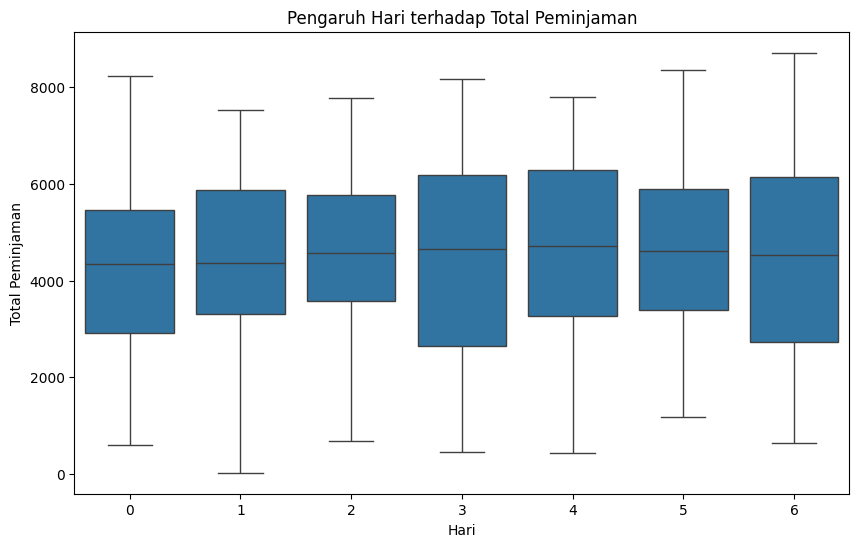

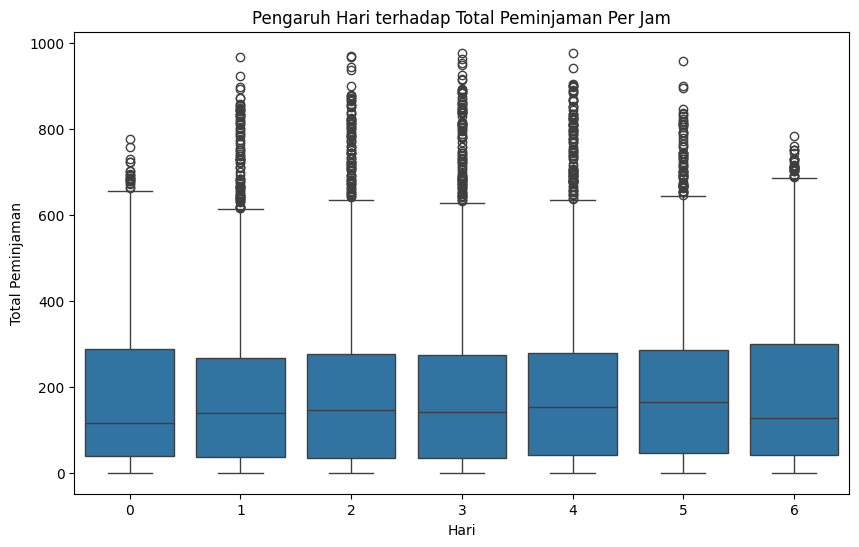

In [178]:
plt.figure(figsize=(10, 6))
sn.boxplot(x='weathersit', y='cnt', data=day_df)
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Peminjaman')
plt.title('Pengaruh Kondisi Cuaca terhadap Total Peminjaman Harian')
plt.show()



plt.figure(figsize=(10, 6))
sn.boxplot(x='weathersit', y='cnt', data=hours_df)
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Peminjaman')
plt.title('Pengaruh Kondisi Cuaca terhadap Total Peminjaman Per Jam')
plt.show()


plt.figure(figsize=(10, 6))
sn.boxplot(x='hr', y='cnt', data=hours_df)
plt.xlabel('Jam')
plt.ylabel('Total Peminjaman')
plt.title('Pengaruh Jam terhadap Total Peminjaman')
plt.show()


plt.figure(figsize=(10, 6))
sn.boxplot(x='weekday', y='cnt', data=day_df)
plt.xlabel('Hari')
plt.ylabel('Total Peminjaman')
plt.title('Pengaruh Hari terhadap Total Peminjaman')
plt.show()


plt.figure(figsize=(10, 6))
sn.boxplot(x='weekday', y='cnt', data=hours_df)
plt.xlabel('Hari')
plt.ylabel('Total Peminjaman')
plt.title('Pengaruh Hari terhadap Total Peminjaman Per Jam')
plt.show()

### Pertanyaan 3: Bagaimana hari libur dan akhir pekan mempengaruhi tingkat peminjaman?

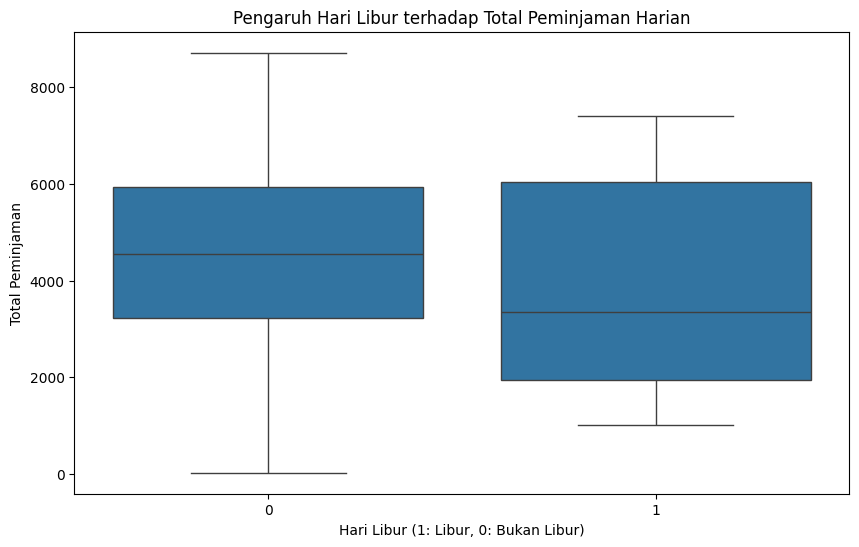

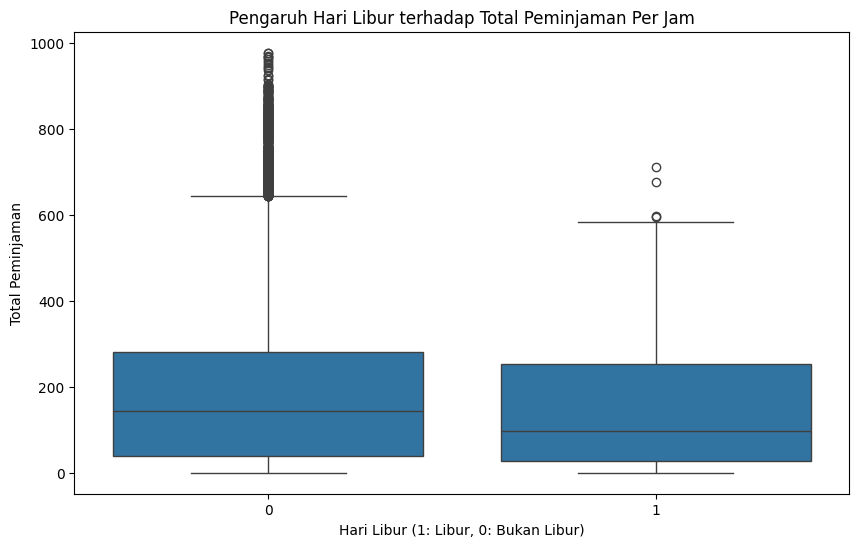

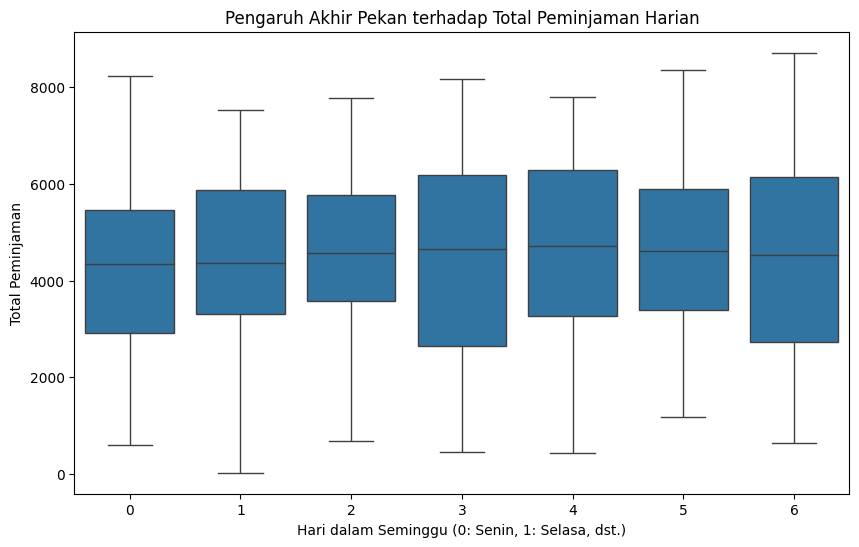

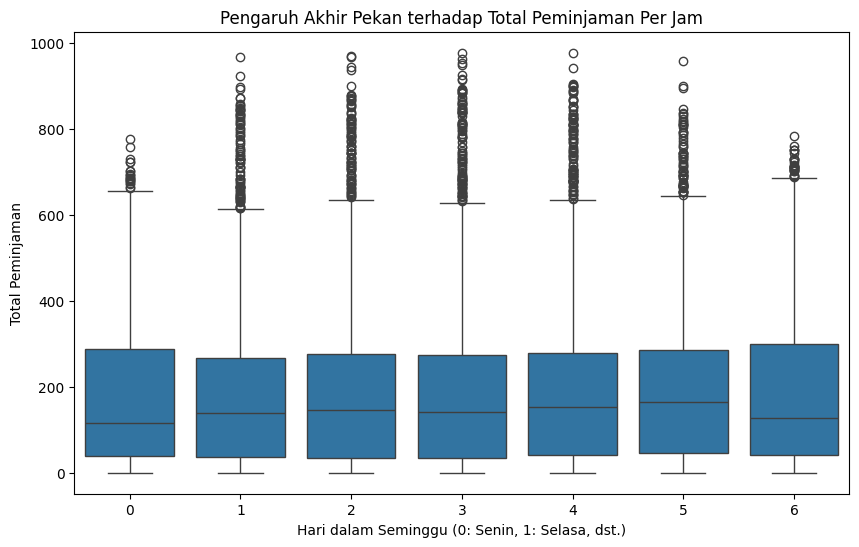

In [179]:
plt.figure(figsize=(10, 6))
sn.boxplot(x='holiday', y='cnt', data=day_df)
plt.xlabel('Hari Libur (1: Libur, 0: Bukan Libur)')
plt.ylabel('Total Peminjaman')
plt.title('Pengaruh Hari Libur terhadap Total Peminjaman Harian')
plt.show()


plt.figure(figsize=(10, 6))
sn.boxplot(x='holiday', y='cnt', data=hours_df)
plt.xlabel('Hari Libur (1: Libur, 0: Bukan Libur)')
plt.ylabel('Total Peminjaman')
plt.title('Pengaruh Hari Libur terhadap Total Peminjaman Per Jam')
plt.show()


plt.figure(figsize=(10, 6))
sn.boxplot(x='weekday', y='cnt', data=day_df)
plt.xlabel('Hari dalam Seminggu (0: Senin, 1: Selasa, dst.)')
plt.ylabel('Total Peminjaman')
plt.title('Pengaruh Akhir Pekan terhadap Total Peminjaman Harian')
plt.show()



plt.figure(figsize=(10, 6))
sn.boxplot(x='weekday', y='cnt', data=hours_df)
plt.xlabel('Hari dalam Seminggu (0: Senin, 1: Selasa, dst.)')
plt.ylabel('Total Peminjaman')
plt.title('Pengaruh Akhir Pekan terhadap Total Peminjaman Per Jam')
plt.show()

### Pertanyaan 4: Musim mana yang memiliki aktivitas tertinggi dan terendah?



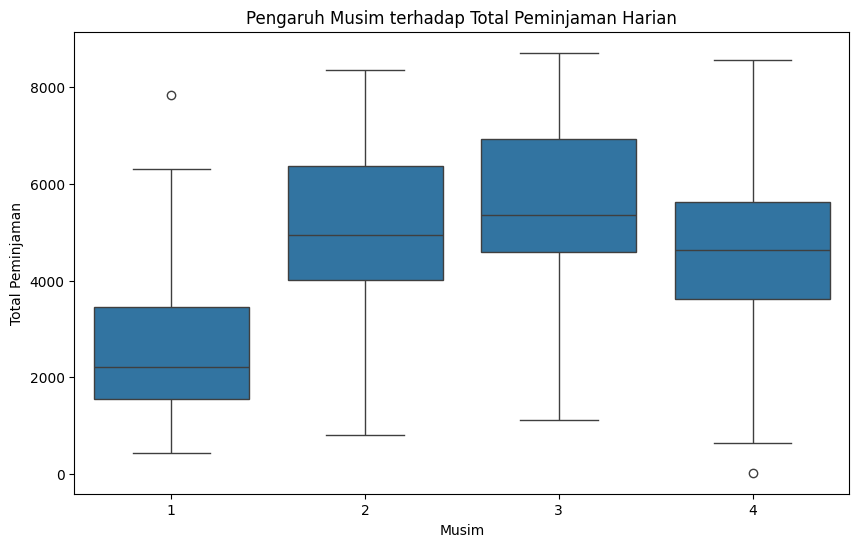

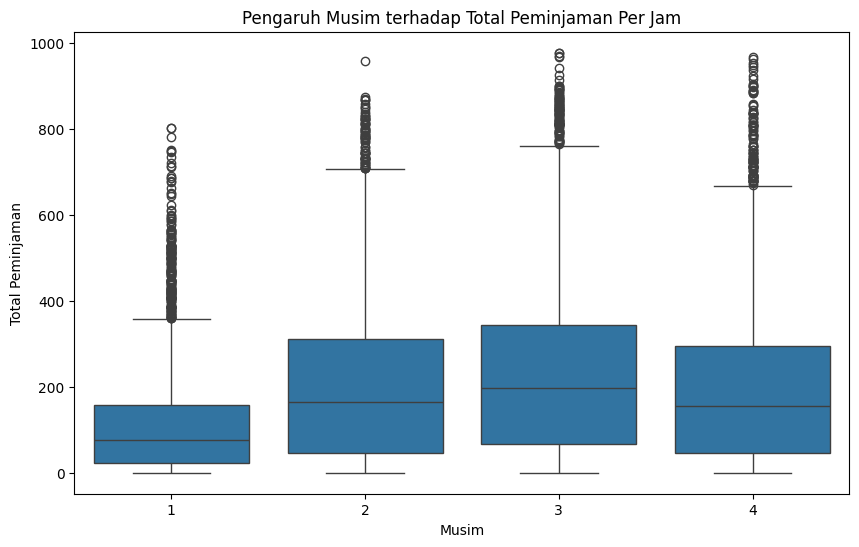

Musim dengan aktivitas tertinggi: 3
Musim dengan aktivitas terendah: 1


In [180]:
plt.figure(figsize=(10, 6))
sn.boxplot(x='season', y='cnt', data=day_df)
plt.xlabel('Musim')
plt.ylabel('Total Peminjaman')
plt.title('Pengaruh Musim terhadap Total Peminjaman Harian')
plt.show()


plt.figure(figsize=(10, 6))
sn.boxplot(x='season', y='cnt', data=hours_df)
plt.xlabel('Musim')
plt.ylabel('Total Peminjaman')
plt.title('Pengaruh Musim terhadap Total Peminjaman Per Jam')
plt.show()


season_activity = day_df.groupby('season')['cnt'].mean()
highest_season = season_activity.idxmax()
lowest_season = season_activity.idxmin()

print(f"Musim dengan aktivitas tertinggi: {highest_season}")
print(f"Musim dengan aktivitas terendah: {lowest_season}")

### Pertanyaan 5: Berapa persentase peminjaman yang dilakukan oleh pengguna kasual dibandingkan dengan pengguna terdaftar?




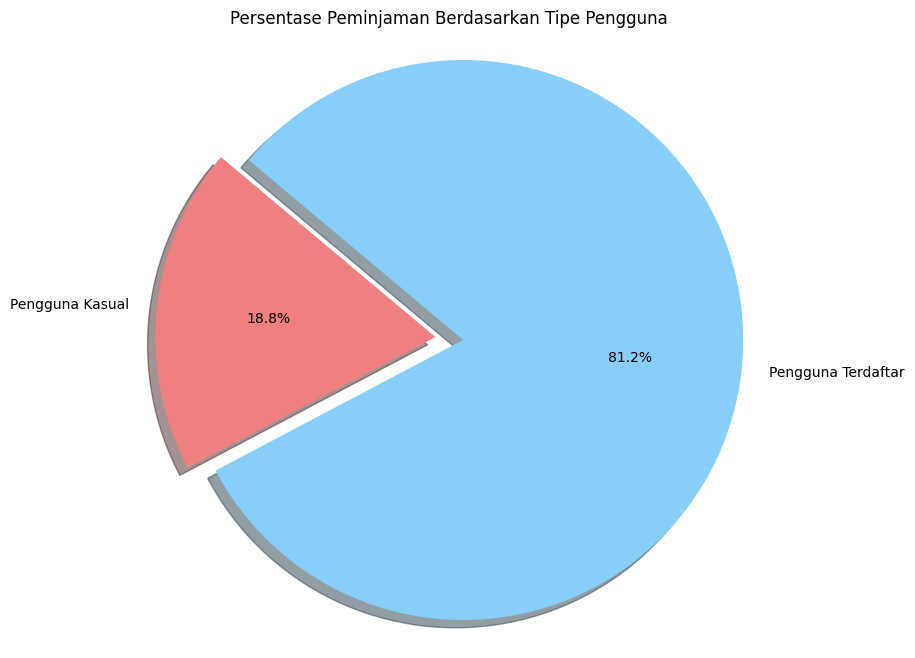

In [181]:


casual_percentage = (day_df['casual'].sum() / day_df['cnt'].sum()) * 100
registered_percentage = (day_df['registered'].sum() / day_df['cnt'].sum()) * 100

labels = ['Pengguna Kasual', 'Pengguna Terdaftar']
sizes = [casual_percentage, registered_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)


plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Persentase Peminjaman Berdasarkan Tipe Pengguna')
plt.show()

### Pertanyaan 6: Berapa rata-rata jumlah peminjaman harian berdasarkan hari dalam seminggu?



weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64


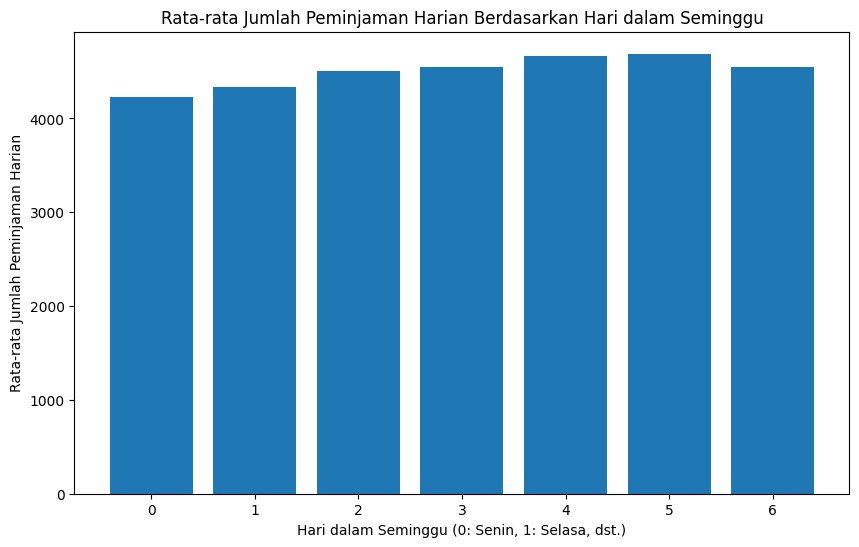

In [182]:
average_daily_rentals_by_weekday = day_df.groupby('weekday')['cnt'].mean()


print(average_daily_rentals_by_weekday)


plt.figure(figsize=(10, 6))
plt.bar(average_daily_rentals_by_weekday.index, average_daily_rentals_by_weekday.values)
plt.xlabel('Hari dalam Seminggu (0: Senin, 1: Selasa, dst.)')
plt.ylabel('Rata-rata Jumlah Peminjaman Harian')
plt.title('Rata-rata Jumlah Peminjaman Harian Berdasarkan Hari dalam Seminggu')
plt.show()

weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64


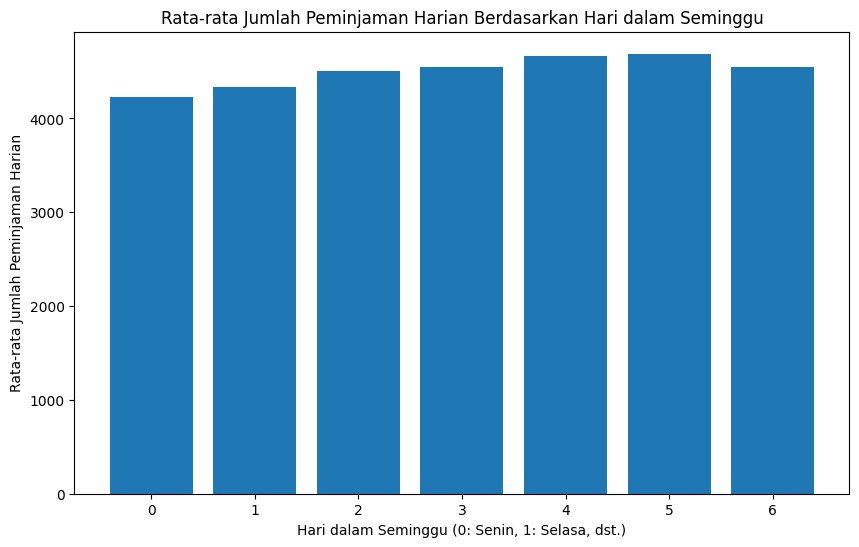

In [183]:
average_daily_rentals_by_weekday = day_df.groupby('weekday')['cnt'].mean()


print(average_daily_rentals_by_weekday)


plt.figure(figsize=(10, 6))
plt.bar(average_daily_rentals_by_weekday.index, average_daily_rentals_by_weekday.values)
plt.xlabel('Hari dalam Seminggu (0: Senin, 1: Selasa, dst.)')
plt.ylabel('Rata-rata Jumlah Peminjaman Harian')
plt.title('Rata-rata Jumlah Peminjaman Harian Berdasarkan Hari dalam Seminggu')
plt.show()

### Pertanyaan 7: Bagaimana perbedaan aktivitas antara hari kerja dan hari libur?





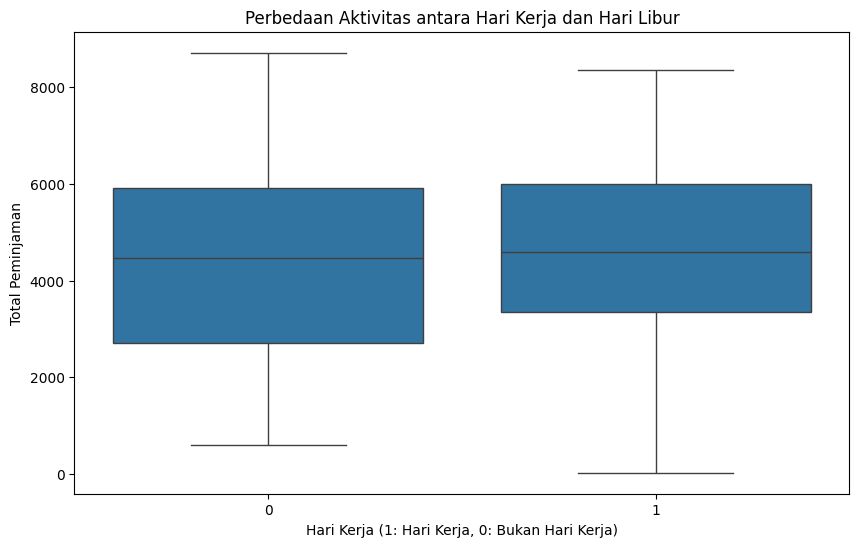

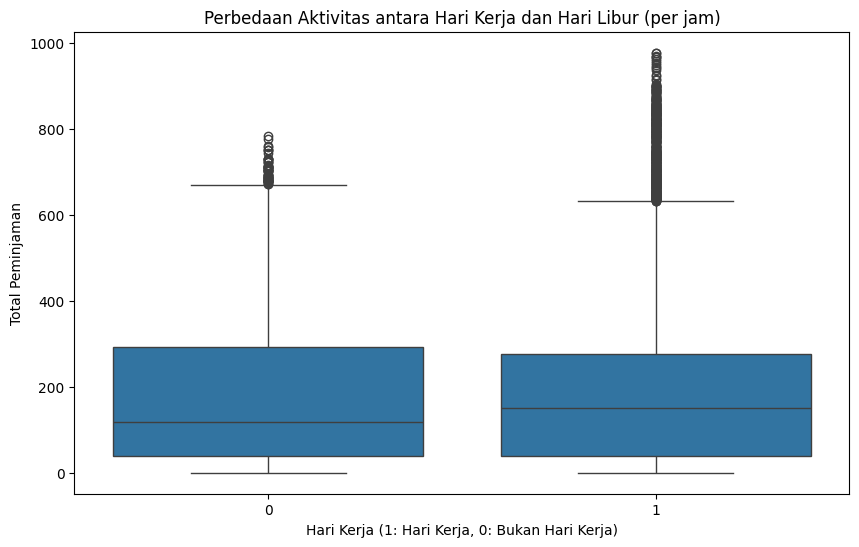

Rata-rata peminjaman pada hari kerja: 4584.82
Rata-rata peminjaman pada hari libur: 4330.168831168831
Rata-rata peminjaman pada hari kerja (per jam): 193.20775389801938
Rata-rata peminjaman pada hari libur (per jam): 181.40533188248097


In [184]:
plt.figure(figsize=(10, 6))
sn.boxplot(x='workingday', y='cnt', data=day_df)
plt.xlabel('Hari Kerja (1: Hari Kerja, 0: Bukan Hari Kerja)')
plt.ylabel('Total Peminjaman')
plt.title('Perbedaan Aktivitas antara Hari Kerja dan Hari Libur')
plt.show()


plt.figure(figsize=(10, 6))
sn.boxplot(x='workingday', y='cnt', data=hours_df)
plt.xlabel('Hari Kerja (1: Hari Kerja, 0: Bukan Hari Kerja)')
plt.ylabel('Total Peminjaman')
plt.title('Perbedaan Aktivitas antara Hari Kerja dan Hari Libur (per jam)')
plt.show()


workingday_average = day_df[day_df['workingday'] == 1]['cnt'].mean()
non_workingday_average = day_df[day_df['workingday'] == 0]['cnt'].mean()

print(f"Rata-rata peminjaman pada hari kerja: {workingday_average}")
print(f"Rata-rata peminjaman pada hari libur: {non_workingday_average}")


workingday_average_hour = hours_df[hours_df['workingday'] == 1]['cnt'].mean()
non_workingday_average_hour = hours_df[hours_df['workingday'] == 0]['cnt'].mean()

print(f"Rata-rata peminjaman pada hari kerja (per jam): {workingday_average_hour}")
print(f"Rata-rata peminjaman pada hari libur (per jam): {non_workingday_average_hour}")

**Insight:**
- Pada dataset day dan hours memiliki trend yang naik turun
- Musim dengan aktivitas tertinggi: 3 | Musim dengan aktivitas terendah: 1
- Terdaftar 81.2 % kasual 18.8%
- Rata-rata peminjaman pada hari kerja: 4584.82
Rata-rata peminjaman pada hari libur: 4330.168831168831
Rata-rata peminjaman pada hari kerja (per jam): 193.20775389801938
Rata-rata peminjaman pada hari libur (per jam): 181.40533188248097
- Semakin cerah/ bagus cuaca aktivitas pengguna semakin naik (sebanding)
- Pada hari libur aktivitas pengguna lebih rendah tetapi pada weekend aktivitas lebih tinggi
- Aktivitas pada hari kerja lebih tinggi pada pengguna terdaftar/registered sedangkan pengguna casual lebih tinggi pada hari libur. Untuk total pengguna, aktivitas lebih tinggi pada hari kerja

## Conclusion

- Pada dataset day dan hours memiliki trend yang naik turun
- Musim dengan aktivitas tertinggi: 3 | Musim dengan aktivitas terendah: 1
- Terdaftar 81.2 % kasual 18.8%
- Rata-rata peminjaman pada hari kerja: 4584.82
Rata-rata peminjaman pada hari libur: 4330.168831168831
Rata-rata peminjaman pada hari kerja (per jam): 193.20775389801938
Rata-rata peminjaman pada hari libur (per jam): 181.40533188248097
- Semakin cerah/ bagus cuaca aktivitas pengguna semakin naik (sebanding)
- Pada hari libur aktivitas pengguna lebih rendah tetapi pada weekend aktivitas lebih tinggi
- Aktivitas pada hari kerja lebih tinggi pada pengguna terdaftar/registered sedangkan pengguna casual lebih tinggi pada hari libur. Untuk total pengguna, aktivitas lebih tinggi pada hari kerja

In [185]:
all_df = pd.concat([day_df, hours_df], ignore_index=True)
all_df.to_csv("all_data.csv", index=False)
day_df.to_csv("day_data.csv", index=False)
hours_df.to_csv("hours_data.csv", index=False)